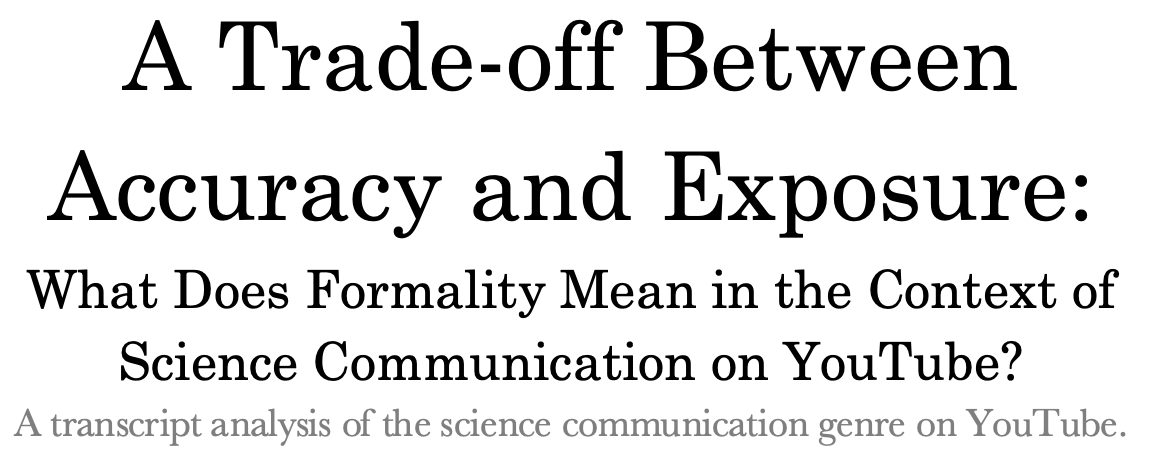

<center> <h1> <font size = "+20"><i>MSc. Thesis <b>Data Collection</b> Notebook<i> </font> </h1> </center>

# 1. Sampling Version 1

We'll start off by selecting videos for the study. As we've defined in the plan of approach, we will be studying two seperate samples. One from which we include the channels that are included, and one which dives into the general domain. This section will concern the former variant.

In [ ]:
# Overall Document Prep:
from pyforest import * # This library quickly imports most of the relevant Data Science libraries
directory = '####'     # Set a working directory

## 1.1 Set-up the Service

We'll be using the Youtube API to select videos.

In [ ]:
# Allocate credentials:
from googleapiclient.discovery import build

# Api Keys
key = "#####"

# Session Build
youtube = build('youtube', 'v3', developerKey = key)

## 1.2 Generate the Sample Using the Service

Below we generate the sample by using the service, passing the channel ID's and populating dataframes. Since the present study focusses on science communication channels, you will find those 5 channels in the dictionary below; however, these may be interchanged at will.

In [ ]:
# Variant 1 Sample Generation
channelids = {'Veritasium'  : 'UCHnyfMqiRRG1u-2MsSQLbXA',
              'VSauce'      : 'UC6nSFpj9HTCZ5t-N3Rm3-HA',
              'Kurzgesagt'  : 'UCsXVk37bltHxD1rDPwtNM8Q',
              'Mark Rober'  : 'UCY1kMZp36IQSyNx_9h4mpCg',
              'asapSCIENCE' : 'UCC552Sd-3nyi_tk2BudLUzA'}

n     = 300
iter  = range(1, (int(n/50+1)))
order = 'rating'

Raw_sample_V1 = pd.DataFrame(columns = ["Video.ID", "Title", "Channel_Name"])

#Iterate through Channels
for channelid in channelids.items():
    
    print(channelid[0])
    
    #Iterate iter number of times to fulfill n; there is a maximum of 50 results per search.
    for i in iter:

        if i == 1:
            
            # Search Request
            request = youtube.search().list(
                part       ="snippet",
                type       = "video",
                maxResults = n,
                channelId  = channelid[1],
                order      = order,    
            ) 

            # Save response
            response = request.execute()

            # Unpack Respons
            rows = []
            
            for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title'],
                                item['snippet']['channelTitle']])

            video_sample = pd.DataFrame(rows, columns = ["Video.ID", "Title", "Channel_Name"])
            print(f'{len(video_sample)} out of {n}')
        
        else:
            try:   
                # Search Request
                request = youtube.search().list(
                    part       = "snippet",
                    type       = "video",
                    maxResults = n,
                    channelId  = channelid[1],
                    order      = order,
                    pageToken  = response['nextPageToken']    
                ) 

                # Save response
                response = request.execute()

                # Unpack Respons
                rows = []

                for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title'],
                                item['snippet']['channelTitle']])

                video_sample_temp = pd.DataFrame(rows, columns = ["Video.ID", "Title", "Channel_Name"])
                video_sample = video_sample.append(video_sample_temp)
                print(f'{len(video_sample)} out of {n}')
            
            except(KeyError):
                print("Results exhausted")
                break
    
    #Cleaning:
    to_delete = ['#short', 
                 ' prank']
    video_sample = video_sample[~video_sample['Title'].str.contains('|'.join(to_delete))] 
    
    #Sampling:
    sample = video_sample.sample(n=100, 
                                 random_state=123,
                                 replace = True)
    
    Raw_sample_V1 = Raw_sample_V1.append(sample)
    print(f'The {channelid[0]} sample has been saved! \n')

#Output:
Raw_sample_V1.to_csv(f'{directory}Raw_Sample_V1.csv', 
                     sep=';', 
                     index=False, 
                     encoding='utf-8')

<p style="page-break-after:always;"></p>

# 2. Sampling Version 2 (OMITTED)

As we've defined in the proposal, we will be studying two seperate samples. One from which we include videos from selected, and one which dives into the general domain. This section will regard the latter variant.

**EDIT:**  
This section was eventually scrapped and omitted from the actualy thesis because the videos retrieved did not concur with the sampling definition. We found it is rather difficult to accurate sample videos without passing channel ids. The code below shows how you could go about doing it; however, controlling your results will be an important challenge you will need to navigate.

**EDIT 2:**  
Also, please note this section was written at the very start of the thesis, using one singular function would make this code much more efficient. 

## 2.1 Set-up the Service

We'll be using the Youtube API to select videos; and we'll use the credentials as defined above.

## 2.2 Generate the Sample Using the Service

Below we generate the sample by using the service. We will be searching based on Keywords as well as video ID's both will retrieve videos related to either parameter.

In [ ]:
# Variant 2 Sample Generation
keywords       = ['Global Warming',
                  'Coronavirus',
                  'Mars Rover',
                  'Fusion Energy',
                  'Genetic engineering']
rand_selec_ids = ['IJ-h0SO8EUI',
                  'LEZCxxKp0hM',
                  'Y52e551lU50',
                  '7u_cm5b1s7Y',
                  'Lx4YuW3bagE',
                  'dMdvwoldnko',
                  'gIAsT2uDGxE',
                  'H6u0VBqNBQ8',
                  'F3QpgXBtDeo',
                  'R13BD8qKeTg']
order          = 'relevance'
iter           = range(1, 150)

Raw_sample_V2  = pd.DataFrame(columns = ["Video.ID", "Title"])

### 2.2.1 Search Based on Keywords

In [ ]:
#Iterate through Keywords
for kw in keywords:
    
    print(f'Searching on {kw}')
    
    #Iterate iter number of times to fulfill n; there is a maximum of 50 results per search.
    for i in range(1, 150):

        if i == 1:
            
            # Search Request
            request = youtube.search().list(
                part              = "snippet",
                q                 = kw,
                type              = "video",
                relevanceLanguage = 'en',
                maxResults        = 2500,
                videoCategoryId   = 28,
                order             = order,
                eventType         = "completed",
                videoDefinition   = 'high',
                videoDuration     = "medium"
            )    
                                                # Bug: It keeps copying ids and includes low quality videos.
            # Save response
            response = request.execute()

            # Unpack Respons
            rows = []
            
            for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title']])

            video_sample = pd.DataFrame(rows, columns = ["Video.ID", "Title"])
            print(f'{len(video_sample)} videos retrieved!')
        
        else:
            try:   
                # Search Request
                request = youtube.search().list(
                    part              = "snippet",
                    q                 = kw,
                    type              = "video",
                    relevanceLanguage = 'en',
                    maxResults        = 2500,
                    videoCategoryId   = 28,
                    order             = order,
                    eventType         = "completed",
                    videoDuration     = "medium",
                    videoDefinition   = 'high',
                    pageToken         = response['nextPageToken']
                ) 

                # Save response
                response = request.execute()

                # Unpack Respons
                rows = []

                for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title']])

                video_sample_temp = pd.DataFrame(rows, columns = ["Video.ID", "Title"])
                video_sample = video_sample.append(video_sample_temp)
                print(f'{len(video_sample)} videos retrieved!')
            
            except(KeyError):
                print("\n Results exhausted \n")
                break
    
    #Cleaning:
    to_delete = ['#short', 
                 ' prank',
                 '[live]',
                 '[LIVE]',
                 'live ',
                 'news',
                 'summit']
    #video_sample = video_sample[~video_sample['Title'].str.contains('|'.join(to_delete))] 
    # Exclusion omitted due to mixed results. 
    
    #Output:
    Raw_sample_V2 = Raw_sample_V2.append(video_sample)
    print(f'The sample searched on {kw} has been saved! \n')

In [ ]:
Raw_sample_V2_kw.to_csv(f'{directory}Raw_Sample_kw.csv', sep = ';')

### 2.3.2 Search Based on Related Video IDs

In [ ]:
#Iterate through Related Video IDs
for rvi in rand_selec_ids:
    
    print(f'Searching {rand_selec_ids.index(rvi) +1} out of {len(rand_selec_ids)} videos')
    
    #Iterate iter number of times to fulfill n; there is a maximum of 50 results per search.
    for i in range(1, 150):

        if i == 1:
            
            # Search Request
            request = youtube.search().list(
                part              = "snippet",
                q                 = kw,
                type              = "video",
                relevanceLanguage = 'en',
                maxResults        = 2500,
                videoCategoryId   = 28,
                order             = order,
                eventType         = "completed",
                videoDefinition   = 'high',
                videoDuration     = "medium"
            )    
                                                        # It keeps copying id's and includes low quality videos.
            # Save response
            response = request.execute()

            # Unpack Respons
            rows = []
            
            for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title']])

            video_sample = pd.DataFrame(rows, columns = ["Video.ID", "Title"])
            print(f'{len(video_sample)} videos retrieved!')
        
        else:
            try:   
                # Search Request
                request = youtube.search().list(
                    part              = "snippet",
                    q                 = kw,
                    type              = "video",
                    relevanceLanguage = 'en',
                    maxResults        = 2500,
                    videoCategoryId   = 28,
                    order             = order,
                    eventType         = "completed",
                    videoDuration     = "medium",
                    videoDefinition   = 'high',
                    pageToken         = response['nextPageToken']
                ) 

                # Save response
                response = request.execute()

                # Unpack Respons
                rows = []

                for item in response['items']:

                    rows.append([item['id']['videoId'],
                                item['snippet']['title']])

                video_sample_temp = pd.DataFrame(rows, columns = ["Video.ID", "Title"])
                video_sample = video_sample.append(video_sample_temp)
                print(f'{len(video_sample)} videos retrieved!')
            
            except(KeyError):
                print("\n Results exhausted \n")
                break
    
    #Cleaning:
    to_delete = ['#short', 
                 ' prank',
                 '[live]',
                 '[LIVE]',
                 'live ',
                 'news',
                 'summit']
    #video_sample = video_sample[~video_sample['Title'].str.contains('|'.join(to_delete))] 
    
    #Output:
    Raw_sample_V2_rvi = Raw_sample_V2.append(video_sample)
    print(f'The sample searched on {kw} has been saved! \n')

In [ ]:
Raw_sample_V2_rvi.to_csv(f'{directory}Raw_Sample_rvi.csv', sep = ';')

<p style="page-break-after:always;"></p>

# 3. Retrieval of Video Statistics

Aside from just selecting videos we also want to collect as much information on said videos as possible. In order to do so, we will be using a different feature of the Youtube API; namely, the list feature. Here we are able to retrieve a myriad of video statistics for either of our samples.

## 3.1 Set-up the Service

In [ ]:
# Allocate credentials:
from googleapiclient.discovery import build

# Api Keys
key = "#####"

# Session Build
youtube = build('youtube', 'v3', developerKey = key)

## 3.2 Define the RetrieveStats() Function to Retrieve the Statistics 

In [ ]:
def RetrieveStats(df):
    
    #Initialize dictionary for the data points to collect:
    stats = {"publishedAt"   : [], 
             "duration"      : [],
             "definition"    : [],
             "viewCount"     : [],
             "likeCount"     : [],
             "dislikeCount"  : [],
             "favoriteCount" : [],
             "commentCount"  : []}

    # Execute request per Video ID
    for vid in df['Video.ID']:
        
        # Formalize Request:
        request = youtube.videos().list(
                part ="snippet,statistics,contentDetails",
                id   = vid
            )
        
        # Save Response
        response = request.execute()
        
        # Store the data in the dictionary
        try:
            stats['publishedAt'].append(response['items'][0]['snippet']['publishedAt'])
        except(KeyError):
            stats['publishedAt'].append(np.nan)
        try:
            stats['duration'].append(response['items'][0]['contentDetails']['duration']) 
        except(KeyError):
            stats['duration'].append(np.nan)
        try:
            stats['definition'].append(response['items'][0]['contentDetails']['definition']) 
        except(KeyError):
            stats['definition'].append(np.nan)
        try:
            stats['viewCount'].append(response['items'][0]['statistics']['viewCount'])
        except(KeyError):
            stats['viewCount'].append(np.nan)
        try:
            stats['likeCount'].append(response['items'][0]['statistics']['likeCount']) 
        except(KeyError):
            stats['likeCount'].append(np.nan)
        try:
            stats['dislikeCount'].append(response['items'][0]['statistics']['dislikeCount']) 
        except(KeyError):
            stats['dislikeCount'].append(np.nan)
        try:
            stats['favoriteCount'].append(response['items'][0]['statistics']['favoriteCount'])
        except(KeyError):
            stats['favoriteCount'].append(np.nan)
        try:
            stats['commentCount'].append(response['items'][0]['statistics']['commentCount'])
        except(KeyError):
            stats['commentCount'].append(np.nan)
            
        # progress report:
        current = raw_sample_V1[raw_sample_V1['Video.ID'] == vid].index[0] + 1
        
        if current % 50 == 0:
            print(f'We are {(current/len(df)*100):.1f}% of the way there!')
    
    # Store data as a dataframe and concatenate it to the original:
    stats = pd.DataFrame(stats)
    df = pd.concat([df, stats], axis = 1)
    
    # Response summary:
    print(f"\nWe couldn't find at least 1 statistic for {df.isna().sum().max()} videos. \nSee a data loss overview below: \n")
    print(df.isna().sum())
    
    return df

## 3.3 Retrieve and Save Video Statistics

In [ ]:
# Read data
raw_sample_V1 = pd.read_csv(f"{directory}Raw_Sample_V1.csv", ';')
#raw_sample_V2 = pd.read_csv(f"{directory}Raw_Sample_V2.csv", ';')


In [ ]:
raw_sample_V1  = RetrieveStats(raw_sample_V1)
#raw_sample_V2 = RetrieveStats(raw_sample_V2)

raw_sample_V1.to_csv(f"{directory}Sample_V1.csv", sep =';')
#raw_sample_V2.to_csv(f"{directory}Sample_V2.csv", sep =';')

<p style="page-break-after:always;"></p>

# 4. Transcription

There will be several parts to this section. First, we'll have to download the vidoes. Then we'll setup the API, then we'll run the transcription, then we'll decode and store the transcriptions as .txt files

**EDIT:**  
Since we dropped Sample V2, everything from here on out will be based on Sample V1

In [ ]:
#Load in sample
Sample_V1 = pd.read_csv(f'{directory}Raw_Sample_V1.csv', sep = ";")
#Sample_V2 = pd.read_csv(f'{directory}Raw_Sample_V2.csv', sep = ";")

## 4.1 Downloading Youtube Audio

In [ ]:
# To download the audio files from youtube videos we'll be using the Youtube-dl library
# This library works on the command line, however we can use subprocess to control a shell
# at the command line with python through Jupyter notebooks. 
import subprocess
import glob # To save time, we try to exclude videos we already downloaded.
downloaded = glob.glob(f"/Volumes/Samsung_T5/Thesis/Audio/{variant}/*.webm") # I used a separate SSD for this
downloaded = [item.replace(f"/Volumes/Samsung_T5/Thesis/Audio/{variant}/", "") for item in downloaded]
downloaded = [item.replace(".webm", "") for item in downloaded]

to_dl = Sample_V1[~Sample_V1['Video.ID'].isin(downloaded)]
to_dl.reset_index(drop=True,inplace=True)

for i in to_dl['Video.ID']:
    command = f'youtube-dl -f 251 http://www.youtube.com/watch?v={i} -o /Volumes/Samsung_T5/Thesis/Audio/V1/{i}.webm'
    subprocess.call(command, shell = True)
    
    # Progress report
    current = to_dl[to_dl['Video.ID'] == i].index[0] + 1
    every   = len(to_dl['Video.ID'])
    
    print(f'{current} out of {every} audio files has been downloaded.')
    print(f'We are {((current/every)*100):.1f}% of the way there! \n')

## 4.2 Transcribing the Youtube Audio

Adapted from: https://github.com/nicknochnack/VideoToText/blob/master/Video%20to%20Text.ipynb

### 4.2.1 Set-up Service

In [ ]:
from ibm_watson import SpeechToTextV1
from ibm_watson.websocket import RecognizeCallback, AudioSource
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
# Setup credentials
key = 'uwM84UUngydIEgHU0gzmvVkRkIA_#########'
url = 'https://api.eu-gb.speech-to-text.watson.cloud.ibm.com/instances/373264b1-d978-4edd-ad4e-#########'

In [ ]:
# Setup service
authenticator = IAMAuthenticator(key)
stt = SpeechToTextV1(authenticator = authenticator)
stt.set_service_url(url)

### 4.2.2 Define the Transcribe() Function to Create .txt Files with Transcriptions

In [ ]:
def Transcribe(df, variant='V1'):
    
    # First up, let's make sure that all of the Video ID's we pass have actually also
    # been succesfully downloaded; this is in an effort to reduce errors. 
    import glob
    downloaded = glob.glob(f"/Volumes/Samsung_T5/Thesis/Audio/{variant}/*.webm")
    downloaded = [item.replace(f"/Volumes/Samsung_T5/Thesis/Audio/{variant}/", "") for item in downloaded]
    downloaded = [item.replace(".webm", "") for item in downloaded]
    
    df = df[df['Video.ID'].isin(downloaded)]
    
    # Since the API limits the number of calls we can give, it is important to conserve
    # our calling capacity. To do so, we make sure to only include videos that are yet
    # to be transcribed. We include this code in our loop so it redfines at every iteration
    # to help us track progress.
    transcribed = glob.glob(f"/Volumes/Samsung_T5/Thesis/Text/{variant}/*.txt")
    transcribed = [item.replace(f"/Volumes/Samsung_T5/Thesis/Text/{variant}/", "") for item in transcribed]
    transcribed = [item.replace(".txt", "") for item in transcribed]
    
    df = df[~df['Video.ID'].isin(transcribed)]
    
    # Second, Let's get transcribing!
    
    # Initialize an empty dictionary to store results:
    res = {}

    for i in df['Video.ID']:
        
        print(i)
        
        with open(f'/Volumes/Samsung_T5/Thesis/Audio/{variant}/{i}.webm', 'rb') as f:
            res[f'{i}'] = stt.recognize(audio=f, 
                                        content_type='audio/webm', 
                                        model='en-US_NarrowbandModel', 
                                        continuous=True).get_result()
    
    # Third, we ought to process the results into .txt documents
        try:
            results = res[f'{i}']['results']

            text = [result['alternatives'][0]['transcript'].rstrip() + '.\n' for result in res[i]['results']]
            text = [para[0].title() + para[1:] for para in text]

            transcript = ''.join(text)

            with open(f'/Volumes/Samsung_T5/Thesis/Text/V1/{i}.txt', 'w') as out:
                out.writelines(transcript)

        except(KeyError):
            pass
    
        # Progress report
        transcribed = glob.glob(f"/Volumes/Samsung_T5/Thesis/Text/{variant}/*.txt")
        transcribed = [item.replace(f"/Volumes/Samsung_T5/Thesis/Text/{variant}/", "") for item in transcribed]
        transcribed = [item.replace(".txt", "") for item in transcribed]
        
        current = len(transcribed) + 1
        every   = len(downloaded)

        print(f'{current} out of {every} files has been transcribed.')
        print(f'We are {((current/every)*100):.1f}% of the way there! \n')
    
    return

### 4.2.3 Carrying Out the Transcription

In [ ]:
%%notify # Instate the notification

Transcribe(Sample_V1, 'V1')

# 5. Natural Language Processing
After having selected videos, downloaded videos and transcribed videos, it is time to process the files and turn them into workable data. We will be engineering several interesting metrics in order to measure formality within our text files aside from the usual metrics connected to textual data and we will be walking through the cleaning and pruning process. 

## 5.1 Load the data

In [ ]:
# Read the Data:
Sample_V1 = pd.read_csv(f'{directory}Sample_V1.csv', 
                        sep = ";",
                        index_col=0)
Sample_V1.reset_index(drop=True,inplace=True)

In [ ]:
def txtReader(df, variant='V1'):
    
    text = {'Transcript': []}
    missing = 0

    for i in df['Video.ID']:

        try:
            # You'll have to change this directory.
            with open(f'/Volumes/Samsung_T5/Thesis/Text/{variant}/{i}.txt') as t:
                text['Transcript'].append(t.read())

        except(FileNotFoundError):

            text['Transcript'].append('No Data')

            missing = missing + 1

    text = pd.DataFrame(text)
    df = pd.concat([df, text], axis = 1)

    print(f'Missing data for {missing} videos')
    
    return df

In [ ]:
Sample_V1 = txtReader(Sample_V1)

In [ ]:
#Remove duplicates and untranscribables
Sample_V1 = Sample_V1.drop_duplicates('Video.ID')        # Exclude duplicate videos
Sample_V1 = Sample_V1[Sample_V1.Transcript != 'No Data'] # Exclude failed transcripts
# Exclude transcripts shorter than 100 words
Sample_V1 = Sample_V1[Sample_V1['Transcript'].apply(lambda x: len(x.split()) > 100)] 
print(f'{len(Sample_V1)} cases remain')

## 5.1 Cleaning

In [ ]:
# Fix duration column, transform it to seconds
import isodate
Sample_V1['duration']    = Sample_V1['duration'].apply(isodate.parse_duration)
Sample_V1['duration']    = Sample_V1['duration'] / np.timedelta64(1, 's')

# Fix published at date, into number of days old
Sample_V1['publishedAt'] = Sample_V1['publishedAt'].apply(isodate.parse_date)

from datetime import date
day_of_collection        = date(2021, 6, 26)
Sample_V1['publishedAt'] = day_of_collection - Sample_V1['publishedAt']
Sample_V1['publishedAt'] = Sample_V1['publishedAt'].dt.days
Sample_V1.rename(columns = {'publishedAt':'days_old'}, inplace=True)

# Remove transcription remenants
Sample_V1['Transcript']  = [re.sub('%HESITATION', '',  t) for t in Sample_V1['Transcript']]

## 5.2 Basic feature engineering

In [ ]:
import spacy
nlp = spacy.load('en')

# Tokenize all of the transcripts
Sample_V1['Document']  = [nlp(x) for x in Sample_V1['Transcript']]

In [ ]:
# Word count
Sample_V1['Word_Count'] = [len(x.split()) for x in Sample_V1['Transcript'].tolist()]

# Character count
Sample_V1['Chr_Count'] = [len(x) for x in Sample_V1['Transcript'].tolist()]

# Sentence count
sent_count = []

for doc in Sample_V1['Document']:
    sent_count.append(len([[token.text for token in sent] for sent in doc.sents]))

Sample_V1['Sentences'] = sent_count

# Average word length
word_len = []

for doc in Sample_V1['Document']:
    try:
        word_len.append(round(sum([len(token) for token in doc])/len(doc),1))
    except:
        word_len.append(0)

Sample_V1['Avg_Word_Length'] = word_len

# Average sentence length
sent_len = []

for doc, numsen in zip(Sample_V1['Document'], Sample_V1['Sentences']):
    try:
        sent_len.append(round(sum([len(sent) for sent in doc.sents])/numsen,1))
    except(ZeroDivisionError):
        sent_len.append(0)

Sample_V1['Avg_Sent_Length'] = sent_len

## 5.3 Processing Transcripts

In [ ]:
# Remove stopwords
Sample_V1['Document_no_stop'] = Sample_V1.Document.apply(lambda text: 
                                                 " ".join(token.text for token in text 
                                                    if not token.is_stop))  
# Lemmatization
lemmas = []

for doc in Sample_V1['Document']:
    lemmas.append(" ".join(token.lemma_ for token in doc))

Sample_V1['Document_lemmatized'] = lemmas

## 5.4 Calculating independent variables

### 5.4.1 F-Score
The F-Score is the first of 5 metrics. The formula reads as follows: 

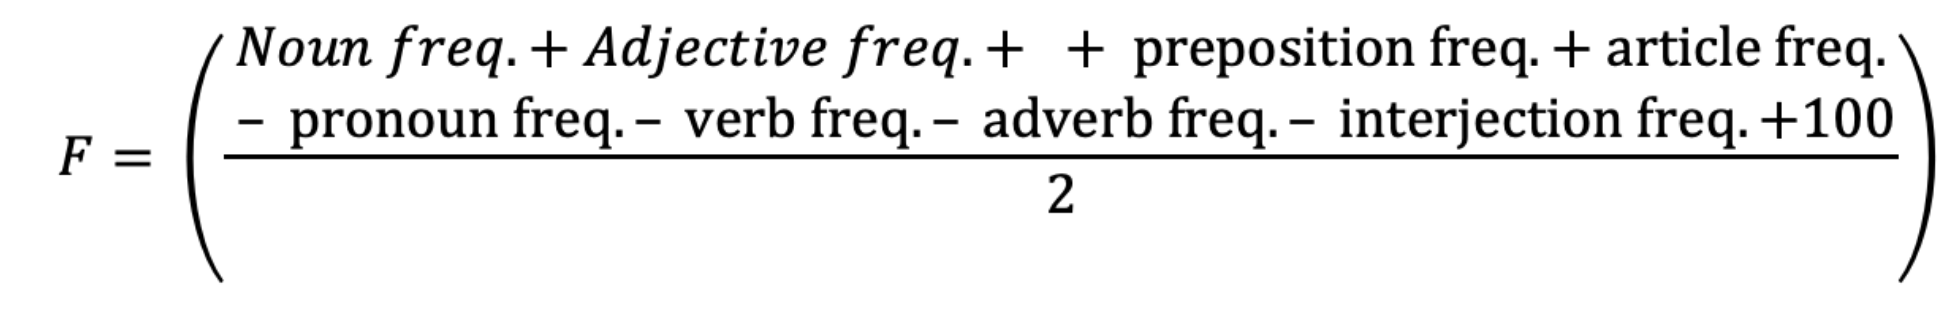

The function below generates the F-Score based on Spacy's POS tagging. It was chosen to normalize the data by dividing it with the total number of tokens as upon further investigation it became clear that the value of the F-Score could be predicted by the number of words in a document. 

In [ ]:
# Dictionary of POS tags for context:
POS = {'nouns'        :92,
       'adjectives'   :84,
       'prepositions' :85,  
       'pronouns'     :95,
       'verbs'        :100, 
       'adverbs'      :86,
       'interjections':91}

**EDIT:**
The following function can be made a lot more efficient, try to optimize it in case you would like to reuse this :)

In [ ]:
def F_Score(df):
    
    # dependencies
    from collections import Counter
    
    F_Scores = []
    
    for doc,tsc in zip(df['Document'], df['Transcript']):
        
        # Retrieve Parts of Speech from SpaCy
        POS_counts = doc.count_by(spacy.attrs.POS)
        
        try:
            nouns = POS_counts[92]
        except(KeyError):
            nouns = 0
        
        try:
            adjectives = POS_counts[84]
        except(KeyError):
            adjectives = 0
        
        try:
            prepositions = POS_counts[85]
        except(KeyError):
            prepositions = 0
        
        # articles need to be retrieved manually
        
        try:
            pronouns = POS_counts[95]
        except:
            pronouns = 0
        
        try:
            verbs = POS_counts[100]
        except(KeyError):
            verbs = 0
        
        try:
            adverbs = POS_counts[86]
        except(KeyError):
            adverbs = 0
        
        try:
            interjections = POS_counts[91]
        except(KeyError):
            interjections = 0

        # Retrieve articles manually
        tsc = tsc.lower()
        freq = Counter(tsc.split())
        articles = freq['an'] + freq['a'] + freq['the']
        
        # Caclulate F-score
        F_Score = (
            (nouns +
             adjectives +
             prepositions +
             articles) -
            pronouns -
            verbs -
            adverbs -
            interjections +
            100
        ) / 2
        
        F_Scores.append(F_Score)
    
    return F_Scores

In [ ]:
Sample_V1['F_Score'] = F_Score(Sample_V1)

### 5.4.2 Readability Scoring
Readability scoring reflects the ease of reading a text. There are many renditions; however, within this work we follow the Dale-Chall formula, one of the oldest. It is based on a list of 3000 words that were found to be familliar by at least 80 percent of Grade 5 children. 

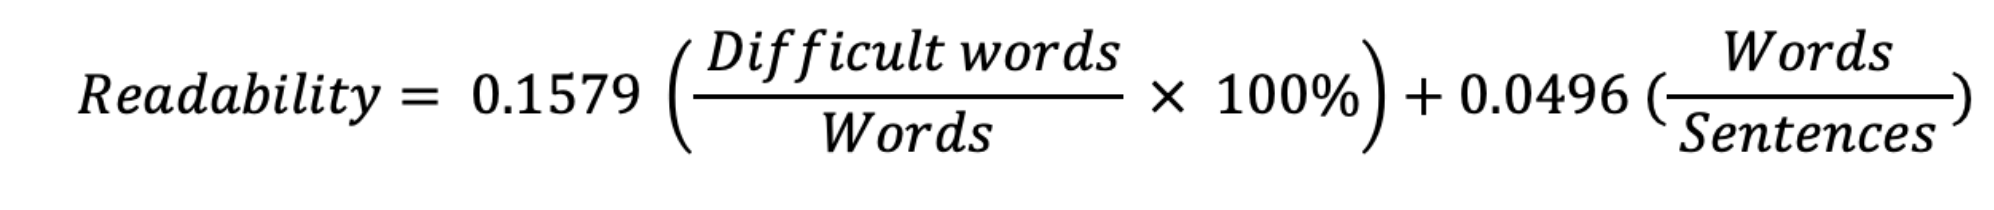

Sources:
- https://readabilityformulas.com/articles/dale-chall-readability-word-list.php
- https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula

In [ ]:
def ReadabilityScore(df):
    
    with open(f'{directory}Dale_Chall_Word_list.txt') as t:
                word_list = t.read().splitlines()
    
    ReadabilityScore = []
    
    for tsc,asl in zip(df['Transcript'], df['Avg_Sent_Length']):
    
        easy_words = 0
    
        for word in tsc.split():
            if (word in word_list):
                easy_words = easy_words + 1
            else:
                pass

        total_words = len(tsc.split())
        pdw = ((total_words - easy_words)/total_words)*100
        raw_score = (0.1579*pdw) + (0.0496*asl)

        if (pdw > 5):

            ReadabilityScore.append(raw_score + 3.3665)

        else:

            ReadabilityScore.append(raw_score)
        
    return ReadabilityScore

In [ ]:
Sample_V1['Readability_Score'] = ReadabilityScore(Sample_V1)

### 5.4.3 Clause Parsing
The next few metrics will be requiring an additional step, which is calles clause parsing. We need to be able to count both independent as well as dependent clauses.

**EDIT:**
This is where the metrics become less accurate due to the difficulty in accurate parsing dependent and independent clauses.

In [ ]:
import stanza
stanza.download('en')          # This downloads the English models for the neural pipeline
stanlp = stanza.Pipeline(lang='en', 
                         processors='tokenize,mwt,pos,lemma,depparse')

def ClauseParsing(df):
    
    clause_count = []
    
    for doc in df['Stanza_doc']:
        
        count = len([word.deprel for sent in doc.sentences for word in sent.words if word.deprel == 'root'])
        clause_count.append(count)
        
        #Progress Report:
        current = df[df['Transcript'] == tsc].index[0] + 1
        every = len(df)
        
        if (current % 50 == 0):

            print(f'{current} out of {every} files have been counted.')
            print(f'We are {((current/every)*100):.1f}% of the way there! \n')
        
        elif(current == len(df)):
            
            print('100% of Transcripts have been parsed.')
    
    return clause_count

In [ ]:
Sample_V1['Stanza_doc'] = stanlp(Sample_V1['Transcript'])
Sample_V1['Clauses'] = ClauseParsing(Sample_V1)

### 5.4.3 Lexical Density
Lexical Density refers to the number of lexical items (nouns, adjectives, verbs or adverbs, basically the most informative parts of speech) as a percentage of the number of clauses within a text, this shows how efficiently information is conveyed. The larger the percentage, the fewer words are used to convey information. 

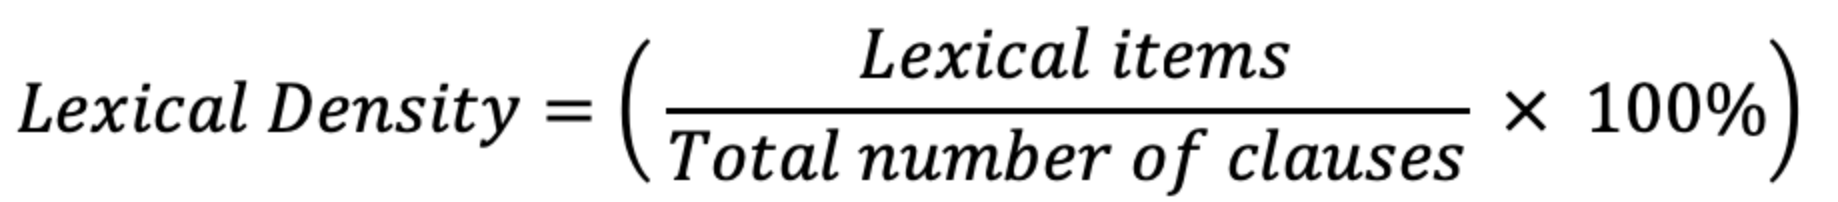

In [ ]:
def LexicalDensity(df):
    
    lexical_density = []
    
    for doc,cc in zip(df['Document'], df['Clauses']):
        
        # Retrieve Parts of Speech from SpaCy
        POS_counts = doc.count_by(spacy.attrs.POS)
        
        try:
            nouns = POS_counts[92]
        except(KeyError):
            nouns = 0
        
        try:
            adjectives = POS_counts[84]
        except(KeyError):
            adjectives = 0
        
        try:
            verbs = POS_counts[100]
        except(KeyError):
            verbs = 0
            
        try:
            adverbs = POS_counts[86]
        except(KeyError):
            adverbs = 0
        
        items = nouns + adjectives + verbs + adverbs
        LD =  (items/cc)
        
        lexical_density.append(LD)
    
    return lexical_density

In [ ]:
Sample_V1['Lexical_Density'] = LexicalDensity(Sample_V1)

### 5.4.4 Mean Lenght Communication Unit
Communication units can be loosely defined as sentences that contain main clauses. The MLCU measure is simply the average length of sentences that convey a main clause.

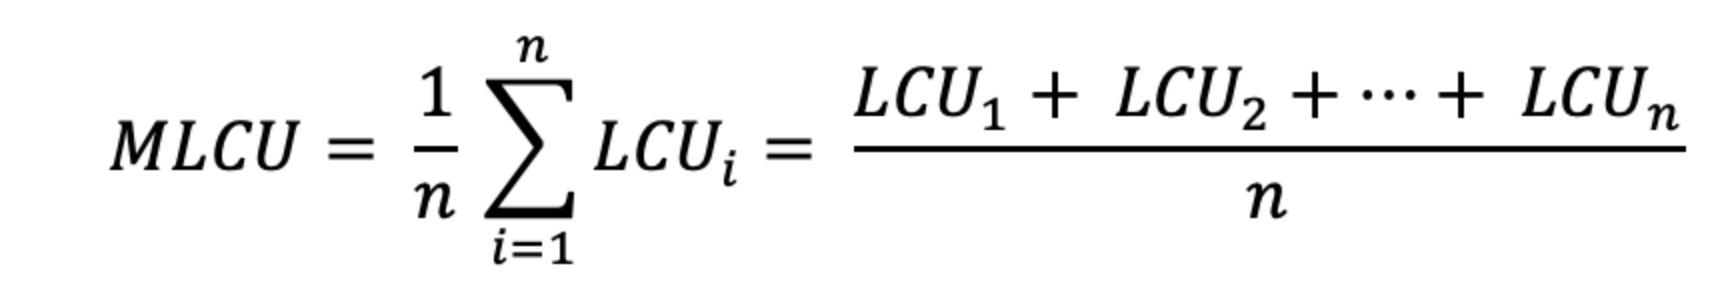

**EDIT:**  
Due to unsophisticated clause parsing the definition of the communication unit is faulty. Please be referred to the paper below for a complete description.

*Nippold, M., Frantz-Kaspar, M., Vigeland, L. (2017). ‘Spoken language production in young adults: Examining syntactic complexity’, Journal of Speech, Language, and Hearing Research, pp. 1339-1347, 60(5). doi:10.1044/2016_JSLHR-L-16-0124*

In [ ]:
def MeanLenghtCommunicationUnit(df):
    
    MeanLenghtCommunicationUnit = []
    
    for tsc,cc in zip(df['Transcript'], df['Clauses']):
        
        doc = stanlp(tsc)
        total_cu_len = sum([len(sent.words) for sent in doc.sentences for word in sent.words if word.deprel == 'root'])
        mclu = total_cu_len/cc
        
        MeanLenghtCommunicationUnit.append(round(mclu,3))
    
        #Progress Report:
        current = df[df['Transcript'] == tsc].index[0] + 1
        every = len(df)
        
        if (current % 50 == 0):

            print(f'{current} out of {every} files have been calculated.')
            print(f'We are {((current/every)*100):.1f}% of the way there! \n')
        
        elif(current == len(df)):
            
            print('100% of Transcripts have been assessed.')
    
    return MeanLenghtCommunicationUnit    

In [ ]:
Sample_V1['MCLU'] = MeanLenghtCommunicationUnit(Sample_V1)

## 5.5 Output Final DataFrame

In [ ]:
Thesis_Dataset =  Sample_V1.drop(['Transcript', 
                                  'Document',
                                  'Document_no_stop',
                                  'Document_lemmatized'], 
                                 axis = 1)

Thesis_Dataset.to_csv(f'{directory}Thesis_Dataset.csv' , sep = ';')

# The End.
The analysis portion of the thesis is not included in this repo as it is tailored to the specific objective and was done in part in R as well. It merely contains the definition of basic data exploration, correlation tables, definition of linear models and robustness checks heavily inspired by [this work](https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb).

It is available upon request. For any other questions, feel free to reach out to me on [LinkedIn](https://www.linkedin.com/in/gerbrandvandijk/).